# Testing walden code

The aim of this notebook is to test the code Walden supplied for ingesting the raw MPL data.

The key questions to test will be:
1. Does Walden's code produce datasets equivalent to the current implementation of `mplgz2ingested`
2. Can Walden's code ingest the raw data from pre-2015?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# code to import Von's code

import sys

class add_path():
    def __init__(self, path):
        self.path = path

    def __enter__(self):
        sys.path.insert(0, self.path)

    def __exit__(self, exc_type, exc_value, traceback):
        try:
            sys.path.remove(self.path)
        except ValueError:
            pass

with add_path('/home/users/eeasm/_scripts/mplgz2ingested/quicklooks'):
    mpl = __import__('mpl')

mpl

<module 'mpl' from '/home/users/eeasm/_scripts/mplgz2ingested/quicklooks/mpl.py'>

In [39]:
fname = '/gws/nopw/j04/icecaps/ICECAPSarchive/mpl/raw/202303210900.mpl.gz'

mpl_2301 = mpl.MPL(fname)
mpl_2301.readData()

In [40]:
mpl_2301.numberRecords

720

In [41]:
#mpl_2301.header

In [42]:
mpl_2301.dataCh1.shape

(720, 1999)

In [43]:
mpl_2301.numberBins

1999

In [44]:
mpl_2301.numberRecords

720

In [45]:
import mplgz2ingested as mplgz

In [46]:
ds_2301 = mplgz.steps.load_raw(fname)
ds_2301

<xarray.Dataset>
Dimensions:                      (profile: 720, range: 1999)
Dimensions without coordinates: profile, range
Data variables: (12/52)
    unit                         (profile) float32 108.0 108.0 ... 108.0 108.0
    version                      (profile) float32 413.0 413.0 ... 413.0 413.0
    shots_sum                    (profile) float64 1.25e+04 ... 1.25e+04
    trigger_frequency            (profile) float64 2.5e+03 2.5e+03 ... 2.5e+03
    energy_monitor               (profile) float64 4.646e+03 ... 4.653e+03
    temp_0                       (profile) float64 1.278e+03 ... 1.314e+03
    ...                           ...
    channel_2                    (profile, range) float32 0.0064 ... 0.016
    time_utc                     (profile) object '2023-03-21T09:00:03' ... '...
    time                         (profile) datetime64[ns] 2023-03-21T09:00:03...
    c                            float64 2.998e+08
    nrb_copol                    (profile, range) float64 -6.822e-09 ... 0.05684
    nrb_crosspol                 (profile, range) float64 3.971e-09 ... 0.3021
Attributes:
    created:   2023-09-25T:13:33:41Z
    software:  mpl2nc (https://github.com/peterkuma/mpl2nc) ; mplgz2ingested ...
    version:   1.3.6

In [47]:
ds_2301 = mplgz.steps.raw_to_ingested(ds_2301)
ds_2301

<xarray.Dataset>
Dimensions:          (time: 720, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2023-03-21T09:00:03 ... 2023-03-21...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] 2023-03-21T09:00:03
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 00:59:55
    hour             (time) float32 9.001 9.002 9.004 ... 9.997 9.998 9.999
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 4.646 4.646 4.646 ... 4.654 4.654 4.653
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.0032 0.0016 0.0 ... 0.016 0.0112
    backscatter_2    (time, height) float32 0.0064 0.0048 ... 0.0208 0.0128
    lat              float32 72.6
    lon              float32 -38.42
    alt              float32 3.2e+03
Attributes:
    Date_created:              2023-09-25T13:33:41 UTC
    Ingest_version:            Id: mplgz2ingested/steps/raw_to_ingested.py ,v...
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...
    Conventions:               CF-1.11-draft

In [48]:
print([k for k in ds_2301.keys()])

['base_time', 'time_offset', 'hour', 'nshots', 'rep_rate', 'energy', 'temp_detector', 'temp_telescope', 'temp_laser', 'mn_background_1', 'sd_background_1', 'mn_background_2', 'sd_background_2', 'initial_cbh', 'backscatter_1', 'backscatter_2', 'lat', 'lon', 'alt']


In [49]:
von_2301 = mplgz.steps.raw_to_ingested(mpl_2301.to_xarray())
von_2301

<xarray.Dataset>
Dimensions:          (time: 720, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2023-03-21T09:00:03 ... 2023-03-21...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] 2023-03-21T09:00:03
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 00:59:55
    hour             (time) float32 9.001 9.002 9.004 ... 9.997 9.998 9.999
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 0.004646 0.004646 ... 0.004654 0.004653
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.0032 0.0016 0.0 ... 0.016 0.0112
    backscatter_2    (time, height) float32 0.0064 0.0048 ... 0.0208 0.0128
    lat              float32 72.6
    lon              float32 -38.42
    alt              float32 3.2e+03
Attributes:
    Date_created:              2023-09-25T13:33:42 UTC
    Ingest_version:            Id: mplgz2ingested/steps/raw_to_ingested.py ,v...
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...
    Conventions:               CF-1.11-draft

In [50]:
for v in ds_2301.coords:
    print('='*20)
    print(v)
    print(np.sum(ds_2301[v] != von_2301[v]))

for v in ds_2301.variables:
    print('='*20)
    print(v)
    print(np.sum(ds_2301[v] != von_2301[v]))

time
<xarray.DataArray 'time' ()>
array(0)
height
<xarray.DataArray 'height' ()>
array(0)
time
<xarray.DataArray 'time' ()>
array(0)
height
<xarray.DataArray 'height' ()>
array(0)
base_time
<xarray.DataArray 'base_time' ()>
array(0)
time_offset
<xarray.DataArray 'time_offset' ()>
array(0)
hour
<xarray.DataArray 'hour' ()>
array(0)
nshots
<xarray.DataArray 'nshots' ()>
array(0)
rep_rate
<xarray.DataArray 'rep_rate' ()>
array(0)
energy
<xarray.DataArray 'energy' ()>
array(720)
temp_detector
<xarray.DataArray 'temp_detector' ()>
array(0)
temp_telescope
<xarray.DataArray 'temp_telescope' ()>
array(0)
temp_laser
<xarray.DataArray 'temp_laser' ()>
array(0)
mn_background_1
<xarray.DataArray 'mn_background_1' ()>
array(0)
sd_background_1
<xarray.DataArray 'sd_background_1' ()>
array(0)
mn_background_2
<xarray.DataArray 'mn_background_2' ()>
array(0)
sd_background_2
<xarray.DataArray 'sd_background_2' ()>
array(0)
initial_cbh
<xarray.DataArray 'initial_cbh' ()>
array(0)
backscatter_1
<xarray.Da

In [51]:
from pvlib.solarposition import get_solarposition
from pandas import DatetimeIndex

In [52]:
tind = DatetimeIndex(von_2301.time.values)
tind

DatetimeIndex(['2023-03-21 09:00:03', '2023-03-21 09:00:08',
               '2023-03-21 09:00:13', '2023-03-21 09:00:18',
               '2023-03-21 09:00:23', '2023-03-21 09:00:28',
               '2023-03-21 09:00:33', '2023-03-21 09:00:38',
               '2023-03-21 09:00:43', '2023-03-21 09:00:48',
               ...
               '2023-03-21 09:59:13', '2023-03-21 09:59:18',
               '2023-03-21 09:59:23', '2023-03-21 09:59:28',
               '2023-03-21 09:59:33', '2023-03-21 09:59:38',
               '2023-03-21 09:59:43', '2023-03-21 09:59:48',
               '2023-03-21 09:59:53', '2023-03-21 09:59:58'],
              dtype='datetime64[ns]', length=720, freq=None)

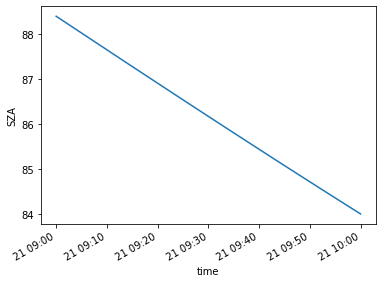

In [53]:
von_2301['SZA'] = (('time'), get_solarposition(tind, von_2301.lat.values, von_2301.lon.values, altitude=von_2301.alt.values)['zenith'].values)
von_2301['SZA'].plot()

In [ ]:
np.sum(ds_2301.channel_1.values == mpl_2301.dataCh1)

In [17]:
np.sum(ds_2301.channel_1.values != mpl_2301.dataCh1)

0

# Earlier file testing.

This will test Von's code on loading files from `201303`

In [139]:
fname = '/gws/nopw/j04/icecaps/ICECAPSarchive/mpl/raw/2013/201306250900.mpl.gz'

mpl_1303 = mpl.MPL(fname)
mpl_1303.readData()

In [129]:
print(mpl_1303.numberRecords, mpl_1303.numberBins)

720 2998


In [122]:
print(mpl_1303.height[0], mpl_1303.height[-1])
print(mpl_1303.height[0], mpl_1303.height[1998])
print(mpl_2301.height[0], mpl_2301.height[1998])
print(mpl_2301.height[0], mpl_2301.height[1200])

-2.9979246150340386 41.92597574125103
-2.9979246150340386 26.95134228915601
-2.9979246150340386 26.95134228915601
-2.9979246150340386 14.989623075170194


In [87]:
plt.plot(ds_2301.height.values - mpl_2301.height[:1200]*1000)

AttributeError: 'Dataset' object has no attribute 'height'

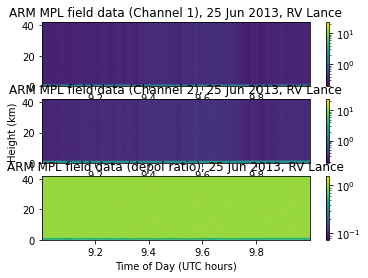

In [123]:
mpl_1303.plotData()

# Function to convert `mpl.MPL` object to xarray dataset for `mplgz2ingested.steps.raw_to_ingested()`

Now we've demonstrated that the older MPL data can be loaded using Von's code, we simply need to use it to generate the right object for use with the current ingesting code...

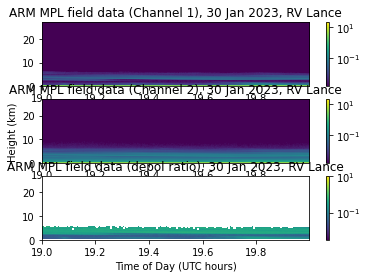

In [101]:
mpl_2301.plotData()

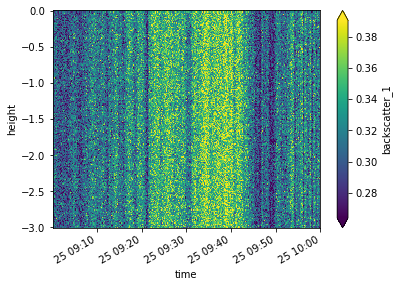

In [124]:
mpl_1303.to_xarray().sel(height=slice(-3,0)).backscatter_1.plot(robust=True, x='time')

In [125]:
ds_von = mpl_1303.to_xarray()
ds_von

<xarray.Dataset>
Dimensions:            (time: 720, height: 1200)
Coordinates:
  * time               (time) datetime64[ns] 2013-06-25T09:00:04 ... 2013-06-...
  * height             (height) float64 -2.998 -2.983 -2.968 ... 14.96 14.97
Data variables: (12/44)
    unitNumber         (time) uint16 107 107 107 107 107 ... 107 107 107 107 107
    version            (time) uint16 412 412 412 412 412 ... 412 412 412 412 412
    year               (time) uint16 2013 2013 2013 2013 ... 2013 2013 2013 2013
    month              (time) uint16 6 6 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6 6 6
    day                (time) uint16 25 25 25 25 25 25 25 ... 25 25 25 25 25 25
    hours              (time) uint16 9 9 9 9 9 9 9 9 9 9 ... 9 9 9 9 9 9 9 9 9 9
    ...                 ...
    systemType         (time) int8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    syncPulsePerSec    (time) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    firstBackgrdBin    (time) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    secondaryHdrSize   (time) uint16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    backscatter_1      (time, height) float64 0.28 0.3136 ... 0.2752 0.3136
    backscatter_2      (time, height) float64 0.2864 0.2848 ... 0.3232 0.3488

In [109]:
print([k for k in ds_von.keys()])
['base_time', 'time_offset', 'hour', 'nshots', 'rep_rate', 'energy', 'temp_detector', 'temp_telescope', 'temp_laser', 'mn_background_1', 'sd_background_1', 'mn_background_2', 'sd_background_2', 'initial_cbh', 'backscatter_1', 'backscatter_2', 'lat', 'lon', 'alt']

['unitNumber', 'version', 'year', 'month', 'day', 'hours', 'minutes', 'seconds', 'Time', 'shotsSum', 'triggerFrequency', 'energyMonitor', 'detectorTemp', 'telescopeTemp', 'laserTemp', 'backgroundAverage', 'backgroundStdDev', 'numberChannels', 'numberBins', 'binTime', 'rangeCalibration', 'numberDataBins', 'scanScenarioFlag', 'numberBackgrdBins', 'azimuthAngle', 'elevationAngle', 'compassDegrees', 'polarizationV0', 'polarizationV1', 'gpsLatitude', 'gpsLongitude', 'cloudBaseHeight', 'aToDdataBadFlag', 'dataFileVersion', 'backgrdAverage2', 'backgrdStdDev2', 'mcsMode', 'firstDataBin', 'systemType', 'syncPulsePerSec', 'firstBackgrdBin', 'secondaryHdrSize', 'backscatter_1', 'backscatter_2', 'profile']


['base_time',
 'time_offset',
 'hour',
 'nshots',
 'rep_rate',
 'energy',
 'temp_detector',
 'temp_telescope',
 'temp_laser',
 'mn_background_1',
 'sd_background_1',
 'mn_background_2',
 'sd_background_2',
 'initial_cbh',
 'backscatter_1',
 'backscatter_2',
 'lat',
 'lon',
 'alt']

In [140]:
VARS_convert = {'unitNumber':'unit', 
                'version':'version', 
                #'Time':'Time',
                'shotsSum':'shots_sum',
                'triggerFrequency': 'trigger_frequency',
                'energyMonitor': 'energy_monitor',
                'backgroundAverage':'background_average',
                'backgroundStdDev':'background_stddev',
                'numberChannels':'number_channels',
                'binTime':'bin_time',
                'rangeCalibration':'range_calibration',
                'numberDataBins':'number_data_bins',
                'scanScenarioFlag':'scan_scenario_flags',
                'numberBackgrdBins':'num_background_bins',
                'azimuthAngle':'azimuth_angle',
                'elevationAngle':'elevation_angle',
                'compassDegrees':'compass_degrees',
                'polarizationV0':'polarization_voltage_0',
                'polarizationV1':'polarization_voltage_1',
                'gpsLatitude':'gps_latitude',
                'gpsLongitude':'gps_longitude',
                'aToDdataBadFlag':'ad_data_bad_flag',
                'dataFileVersion':'data_file_version',
                'backgrdAverage2':'background_average_2',
                'backgrdStdDev2':'background_stddev_2',
                'mcsMode':'mcs_mode',
                'firstDataBin':'first_data_bin',
                'systemType':'system_type',
                'syncPulsePerSec':'sync_pulses_seen_per_second',
                'firstBackgrdBin':'first_background_bin',
                'detectorTemp':'temp_0',
                'telescopeTemp':'temp_2',
                'laserTemp':'temp_3'
               }

# convert the mpl.MPL.header dictionary to contain the above fields

for k,v in VARS_convert.items():
    mpl_1303.header[v] = mpl_1303.header.pop(k)
    if v[:4] == 'temp':
        mpl_1303.header[v] = mpl_1303.header[v] * 100
    print(f'{k} converted into {v}')

print([k for k in mpl_1303.header.keys()])

unitNumber converted into unit
version converted into version
shotsSum converted into shots_sum
triggerFrequency converted into trigger_frequency
energyMonitor converted into energy_monitor
backgroundAverage converted into background_average
backgroundStdDev converted into background_stddev
numberChannels converted into number_channels
binTime converted into bin_time
rangeCalibration converted into range_calibration
numberDataBins converted into number_data_bins
scanScenarioFlag converted into scan_scenario_flags
numberBackgrdBins converted into num_background_bins
azimuthAngle converted into azimuth_angle
elevationAngle converted into elevation_angle
compassDegrees converted into compass_degrees
polarizationV0 converted into polarization_voltage_0
polarizationV1 converted into polarization_voltage_1
gpsLatitude converted into gps_latitude
gpsLongitude converted into gps_longitude
aToDdataBadFlag converted into ad_data_bad_flag
dataFileVersion converted into data_file_version
backgrdAv

In [146]:
def convert_MPL_to_xr(mplO):
    for k,v in VARS_convert.items():
        mplO.header[v] = mplO.header.pop(k)
        if v[:4] == 'temp':
            mplO.header[v] = mplO.header[v] * 100
    ds = mplO.to_xarray()
    ds['profile'] = ds['time']
    ds['channel_1'] = ds['backscatter_1']
    ds['channel_2'] = ds['backscatter_2']
    return ds

In [147]:
ds_mpl_2301 = convert_MPL_to_xr(mpl_2301)

In [149]:
ds_mpl_2301_ing = mplgz.steps.raw_to_ingested(ds_mpl_2301)

In [157]:
for v in ds_2301.coords:
    print('='*20)
    print(v)
    print(np.sum(ds_2301[v] != ds_mpl_2301_ing[v]))

for v in ds_2301.variables:
    print('='*20)
    print(v)
    print(np.sum(ds_2301[v] != ds_mpl_2301_ing[v]))

time
<xarray.DataArray 'time' ()>
array(0)
height
<xarray.DataArray 'height' ()>
array(0)
time
<xarray.DataArray 'time' ()>
array(0)
height
<xarray.DataArray 'height' ()>
array(0)
base_time
<xarray.DataArray 'base_time' ()>
array(0)
time_offset
<xarray.DataArray 'time_offset' ()>
array(0)
hour
<xarray.DataArray 'hour' ()>
array(0)
nshots
<xarray.DataArray 'nshots' ()>
array(0)
rep_rate
<xarray.DataArray 'rep_rate' ()>
array(0)
energy
<xarray.DataArray 'energy' ()>
array(720)
temp_detector
<xarray.DataArray 'temp_detector' ()>
array(0)
temp_telescope
<xarray.DataArray 'temp_telescope' ()>
array(0)
temp_laser
<xarray.DataArray 'temp_laser' ()>
array(0)
mn_background_1
<xarray.DataArray 'mn_background_1' ()>
array(0)
sd_background_1
<xarray.DataArray 'sd_background_1' ()>
array(0)
mn_background_2
<xarray.DataArray 'mn_background_2' ()>
array(0)
sd_background_2
<xarray.DataArray 'sd_background_2' ()>
array(0)
initial_cbh
<xarray.DataArray 'initial_cbh' ()>
array(0)
backscatter_1
<xarray.Da

In [141]:
ds_1303 = mpl_1303.to_xarray()
ds_1303

<xarray.Dataset>
Dimensions:                      (time: 720, height: 1200)
Coordinates:
  * time                         (time) datetime64[ns] 2013-06-25T09:00:04 .....
  * height                       (height) float64 -2.998 -2.983 ... 14.96 14.97
Data variables: (12/44)
    year                         (time) uint16 2013 2013 2013 ... 2013 2013 2013
    month                        (time) uint16 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6
    day                          (time) uint16 25 25 25 25 25 ... 25 25 25 25 25
    hours                        (time) uint16 9 9 9 9 9 9 9 9 ... 9 9 9 9 9 9 9
    minutes                      (time) uint16 0 0 0 0 0 0 ... 59 59 59 59 59 59
    seconds                      (time) uint16 4 9 14 19 24 ... 39 44 49 54 59
    ...                           ...
    first_background_bin         (time) uint16 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    temp_0                       (time) float64 1.971e+03 ... 1.996e+03
    temp_2                       (time) float64 1.628e+03 1.63e+03 ... 1.668e+03
    temp_3                       (time) float64 2.085e+03 ... 2.099e+03
    backscatter_1                (time, height) float64 0.28 0.3136 ... 0.3136
    backscatter_2                (time, height) float64 0.2864 0.2848 ... 0.3488

In [143]:
ds_1303_ing = ds_1303
ds_1303_ing['profile'] = ds_1303_ing['time']
ds_1303_ing['channel_1'] = ds_1303_ing['backscatter_1']
ds_1303_ing['channel_2'] = ds_1303_ing['backscatter_2']
ds_1303_ing = mplgz.steps.raw_to_ingested(ds_1303)

In [144]:
ds_1303_ing

<xarray.Dataset>
Dimensions:          (time: 720, height: 1200)
Coordinates:
  * time             (time) datetime64[ns] 2013-06-25T09:00:04 ... 2013-06-25...
  * height           (height) float64 -3e+03 -2.985e+03 ... 1.496e+04 1.497e+04
Data variables: (12/19)
    base_time        datetime64[ns] 2013-06-25T09:00:04
    time_offset      (time) timedelta64[ns] 00:00:00 00:00:05 ... 00:59:55
    hour             (time) float32 9.001 9.002 9.004 9.005 ... 9.997 9.998 10.0
    nshots           (time) int32 12500 12500 12500 12500 ... 12500 12500 12500
    rep_rate         (time) int32 2500 2500 2500 2500 ... 2500 2500 2500 2500
    energy           (time) float32 0.00415 0.004149 ... 0.004195 0.004195
    ...               ...
    initial_cbh      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    backscatter_1    (time, height) float32 0.28 0.3136 0.2624 ... 0.2752 0.3136
    backscatter_2    (time, height) float32 0.2864 0.2848 ... 0.3232 0.3488
    lat              float32 72.6
    lon              float32 -38.42
    alt              float32 3.2e+03
Attributes:
    Date_created:              2023-09-25T12:11:27 UTC
    Ingest_version:            Id: mplgz2ingested/steps/raw_to_ingested.py ,v...
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...
    Conventions:               CF-1.11-draft